# Plotting ArchR UMAP

In [ ]:
here::i_am("rna_atac/dimensionality_reduction/WNN.ipynb")

source(here::here("settings.R"))
source(here::here("utils.R"))

In [64]:
args = list()
# RNA
args$atac_metadata = file.path(io$basedir, 'results/atac/archR/qc/sample_metadata_update_PeakClusters.txt.gz')
args$atac_npcs = 20
args$atac_nfeatures = 45000
args$atac_umap = sprintf('%s/results/atac/archR/dimensionality_reduction/cells/PeakMatrix/remove_ExE_cells_FALSE/batch_correction_None/umap_nfeatures%s_dims%s_nneighbour25_mindist0.3.txt.gz', 
                        io$basedir, 
                        args$atac_nfeatures,
                        args$atac_npcs)
# outdir
args$outdir = file.path(io$basedir, 'results/atac/archR/dimensionality_reduction/cells/PeakMatrix/plots/')
dir.create(args$outdir, recursive=TRUE, showWarnings =FALSE)

In [53]:
meta = fread(args$atac_metadata)[pass_atacQC==TRUE & doublet_call==FALSE | pass_atacQC==TRUE & is.na(doublet_call)]

In [54]:
meta = meta %>%
    .[,`:=`(day = stringr::str_replace_all(sample,opts$sample2day),
           exp = stringr::str_replace_all(sample,opts$sample2exp) ,
           genotype = stringr::str_replace_all(sample,opts$sample2genotype))] %>%
    .[,Clusters_PeakMatrix2:=NULL] # duplicated in metadata??

In [72]:
nrow(meta)

[1] 35536

In [55]:
umap.dt = fread(args$atac_umap) %>% 
    setnames(c('umap1', 'umap2'), c('UMAP1', 'UMAP2')) %>%
    merge(.,meta, by='cell')

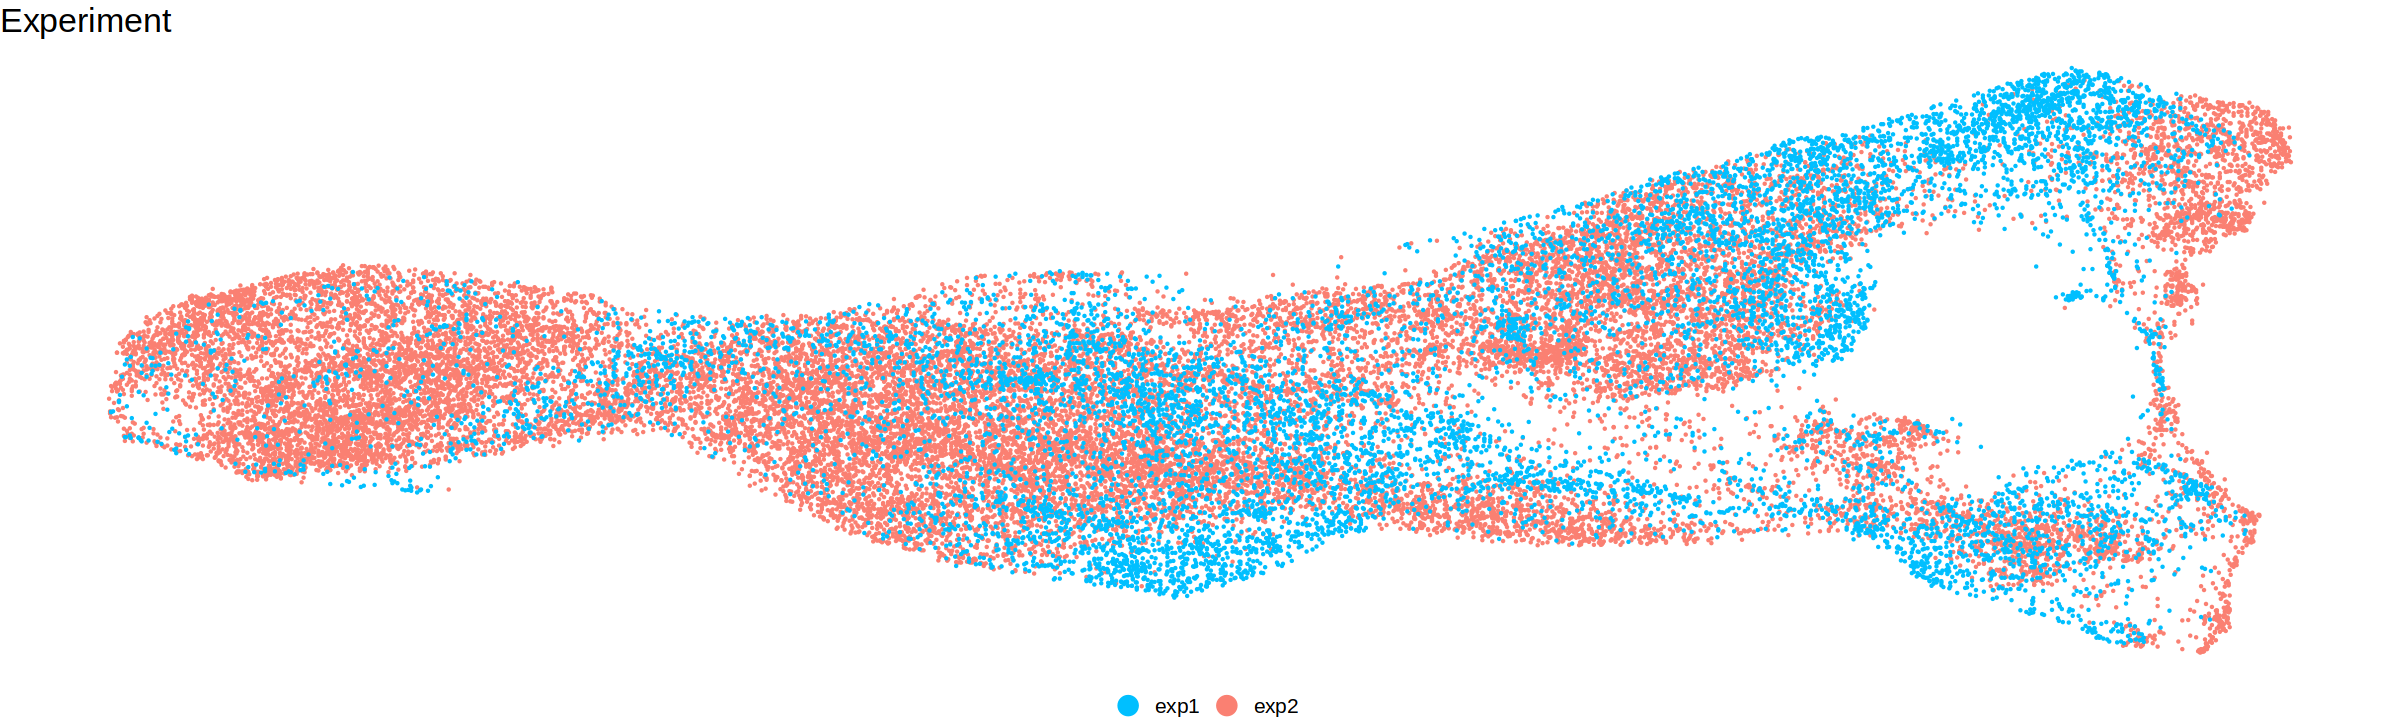

In [66]:
dot_size = 5
text_size = 15
title_size = 20

# Plot umap
p1 = ggplot(umap.dt, aes(UMAP1, UMAP2, col=exp)) + 
    geom_point(size=0.2) + 
    scale_color_manual(values=c('exp1' = 'deepskyblue', 'exp2' = 'salmon'), name='') +
    guides(colour = guide_legend(override.aes = list(size=dot_size))) + 
    ggtitle('Experiment') +
    theme_void() +
    theme(text=element_text(size=text_size), 
         plot.title=element_text(size=title_size), 
         legend.position='bottom')
p1

In [67]:
umap.dt$day_genotype = paste0(umap.dt$day, '-', umap.dt$genotype)
umap.dt$day_genotype = gsub('wt', 'WT', umap.dt$day_genotype)
umap.dt$day_genotype = gsub('eomes_ko', 'KD', umap.dt$day_genotype)
umap.dt$day_genotype = factor(umap.dt$day_genotype, levels=c('D3-WT','D3.5-WT','D3.5-KD','D4-WT','D4-KD','D4.5-WT','D4.5-KD','D5-WT','D5-KD'))

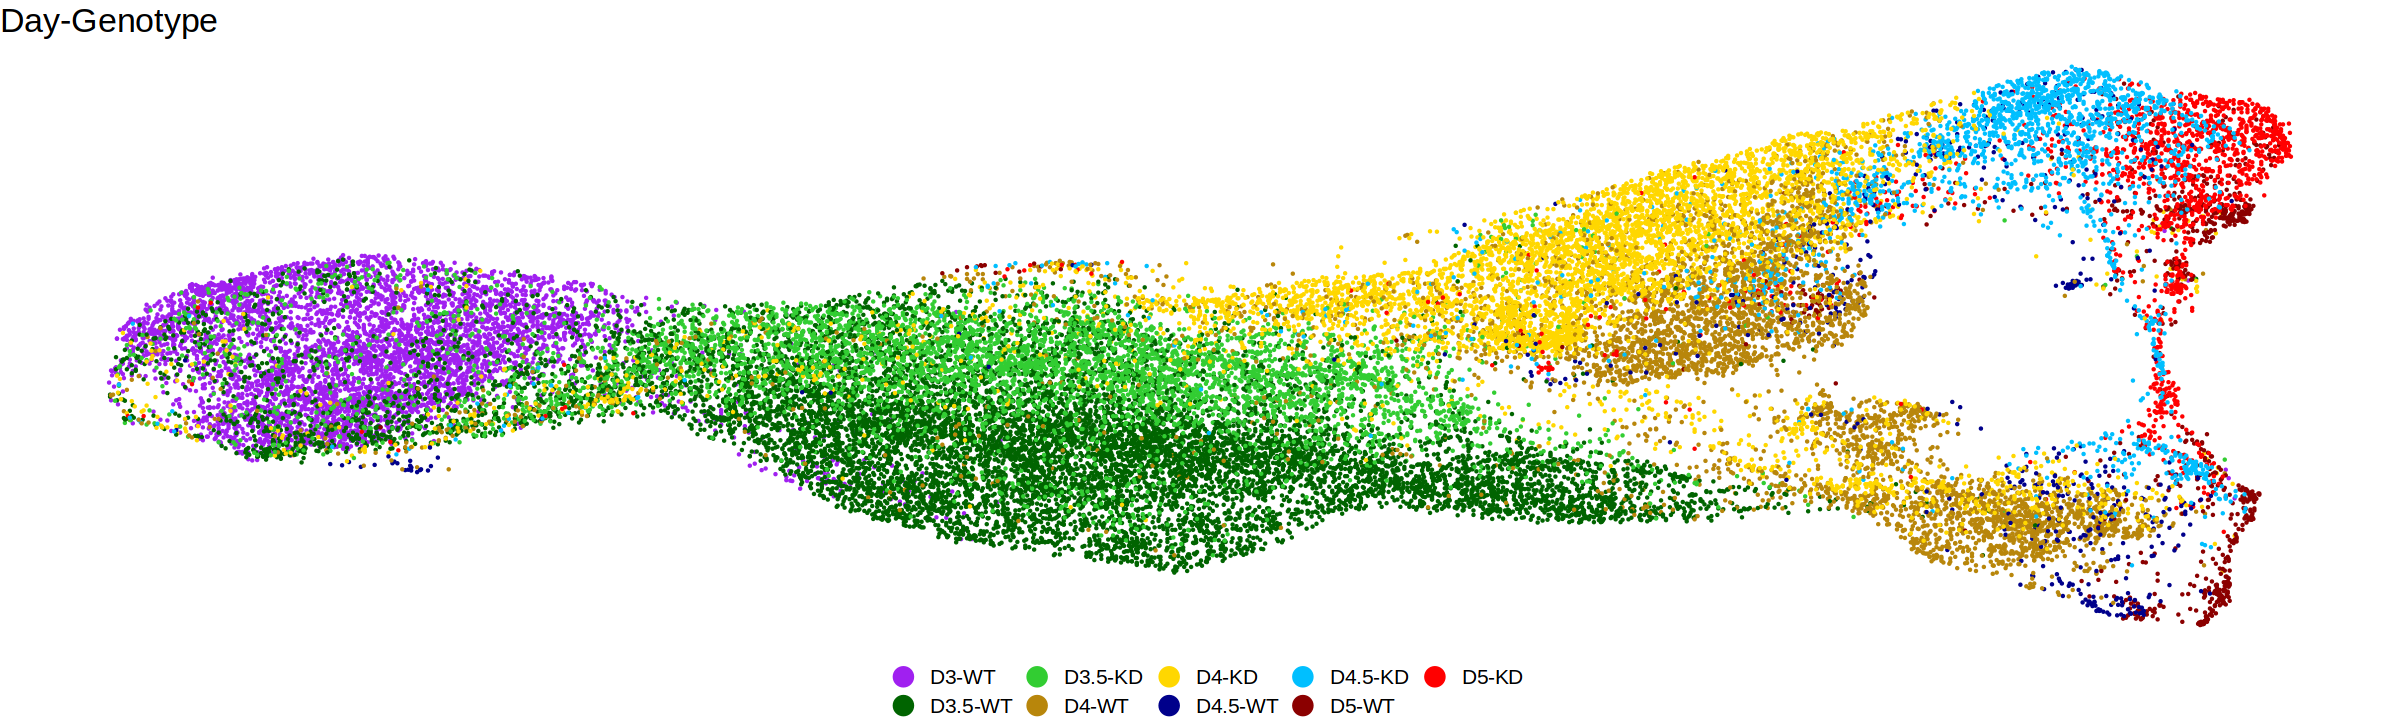

In [68]:
# Plot umap
p2 = ggplot(umap.dt, aes(UMAP1, UMAP2, col=day_genotype)) + 
    geom_point(size=0.2) + 
    scale_color_manual(values=c('D3-WT' = 'purple', 
                                'D3.5-WT' = 'darkgreen', 
                                'D3.5-KD' = 'limegreen',
                                'D4-WT' = 'darkgoldenrod', 
                                'D4-KD' = 'gold',
                                'D4.5-WT' = 'darkblue',
                                'D4.5-KD' = 'deepskyblue', 
                                'D5-WT' = 'darkred',
                                'D5-KD' = 'red'
                               ), name='') +
    guides(colour = guide_legend(override.aes = list(size=dot_size))) + 
    ggtitle('Day-Genotype') +
    theme_void() +
    theme(text=element_text(size=text_size), 
         plot.title=element_text(size=title_size), 
         legend.position='bottom')
p2

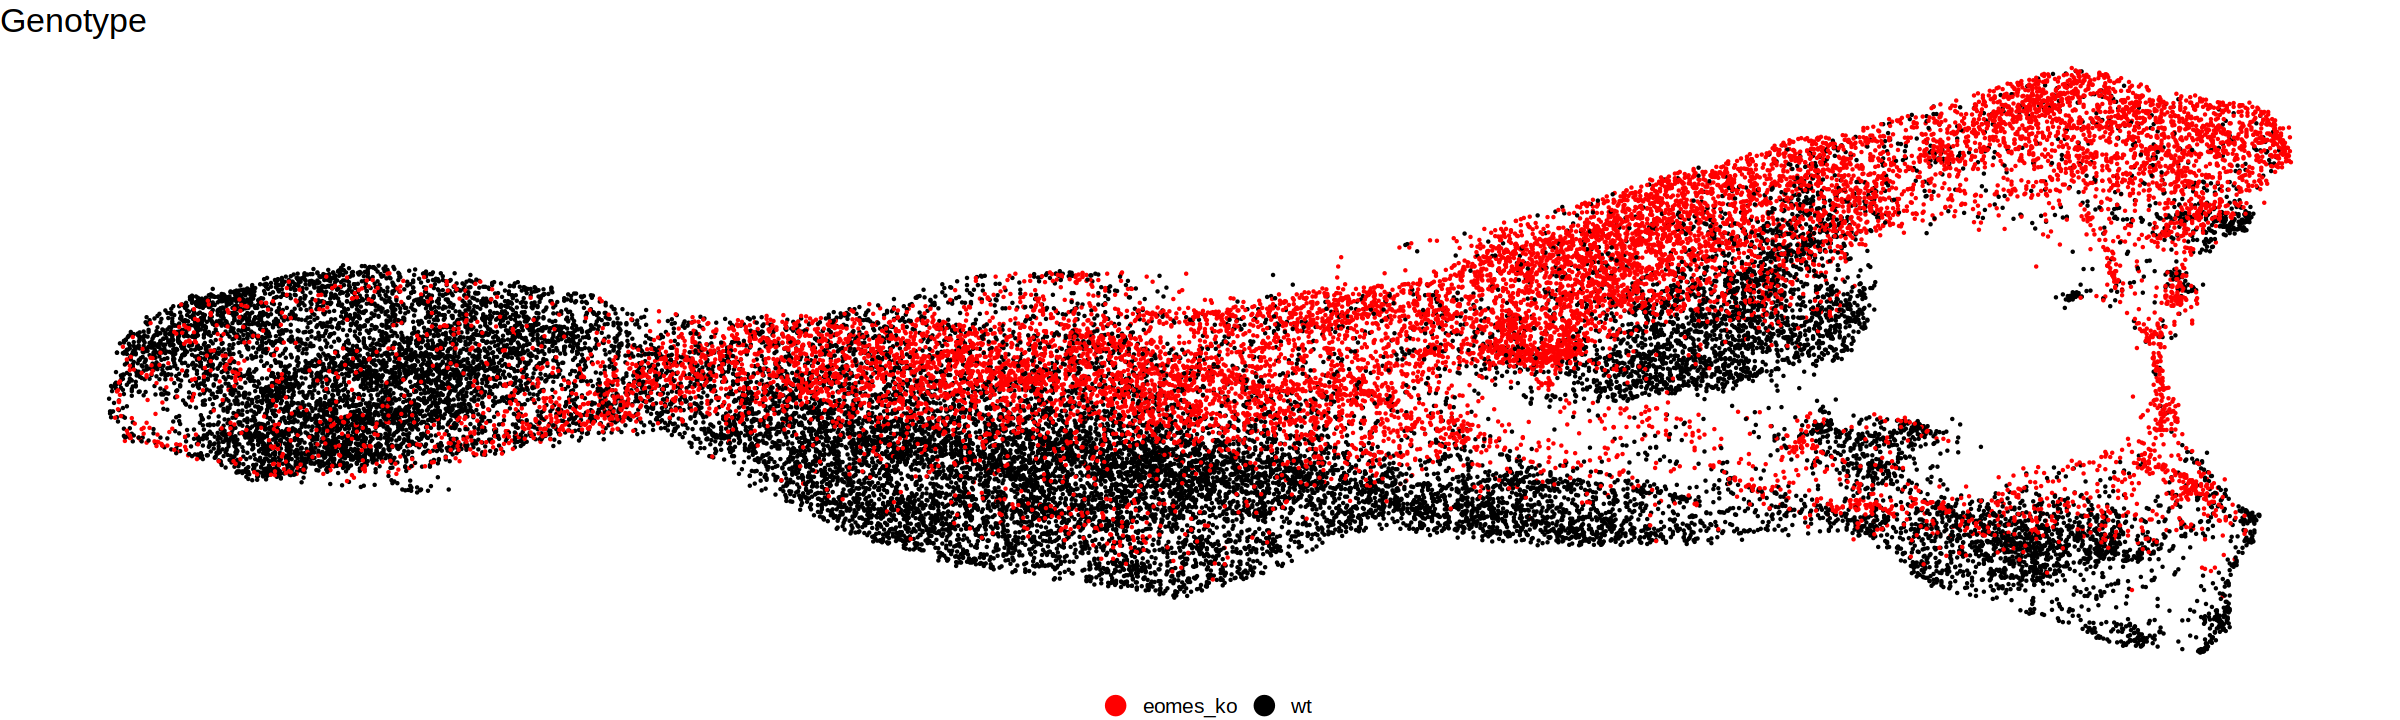

In [69]:
# Plot umap
p3 = ggplot(umap.dt, aes(UMAP1, UMAP2, col=genotype)) + 
    geom_point(size=0.2) + 
    scale_color_manual(values=c('wt' = 'black', 'eomes_ko' = 'red'), name='') + 
    guides(colour = guide_legend(override.aes = list(size=dot_size))) + 
    ggtitle('Genotype') +
    theme_void() +
    theme(text=element_text(size=text_size), 
         plot.title=element_text(size=title_size), 
         legend.position='bottom')
p3

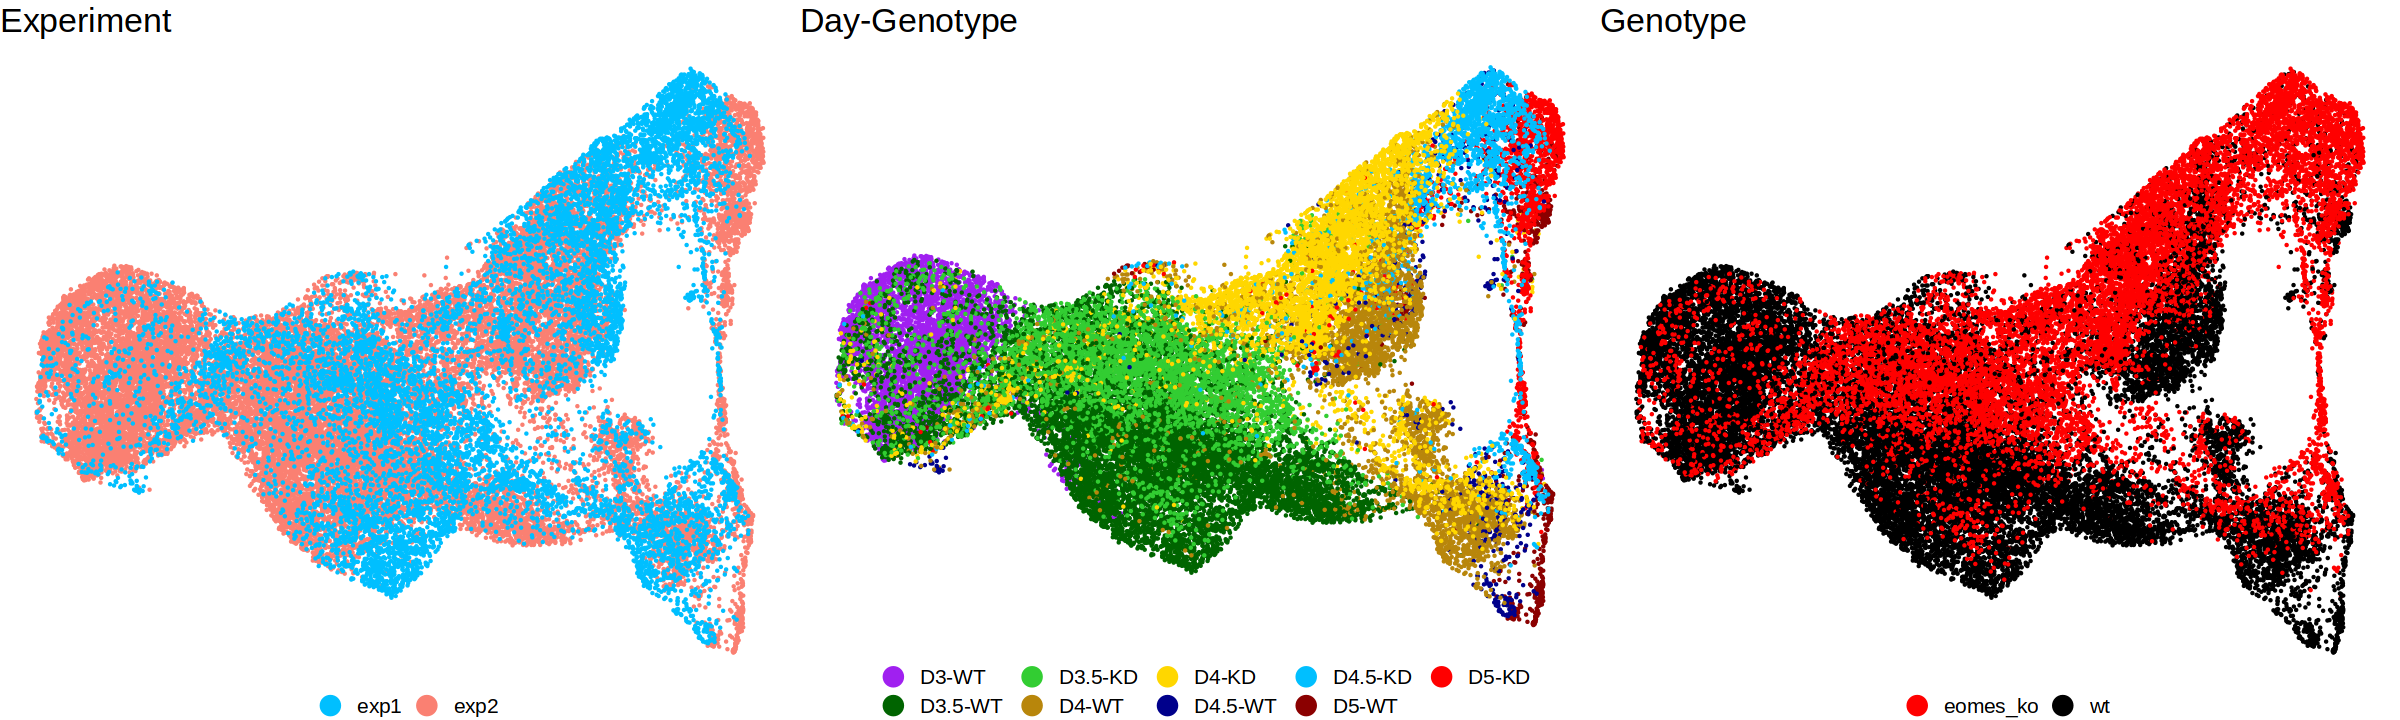

In [70]:
options(repr.plot.width=20, repr.plot.height=6)
ggarrange(p1, p2, p3, ncol=3)

In [71]:
pdf(sprintf('%s/regressed_umap_feature%s_pcs%s.pdf', args$outdir, args$atac_nfeatures, args$atac_npcs), width=15, height=5)
    ggarrange(p1, p2, p3, ncol=3)
dev.off()

png 
  2